<table style="width:100%">
    <tr>
        <td>
            <a href="http://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Geometry_of_cycles/Start_from_Basics/What_is_subfigure.html">
  <img src="../../svg/view-html.svg" alt="View HTML"/>
            </a>
        </td>
        <td>
<a href="https://github.com/vvkisil/MoebInv-notebooks/blob/master/Geometry_of_cycles/Start_from_Basics/What_is_subfigure.ipynb">
  <img src="../../svg/open-github.svg" alt="Open In GitHub"/>
            </a>
        </td>
        <td>
            <a href="https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Geometry_of_cycles/Start_from_Basics/What_is_subfigure.ipynb">
  <img src="../../svg/exec-colab.svg" alt="Run In Colab"/>
            </a>
        </td>
        <td>
            <a href="https://codeocean.com/capsule/7952650/tree">
  <img src="../../svg/code-ocean.svg" alt="Code Ocean"/>
            </a>
        </td>
    </tr>
 </table>


# Start from the basics: What is a subfigure, anyway?
### [Vladimir V Kisil](http://www1.maths.leeds.ac.uk/~kisilv/)

While constructing [*figures*](https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Geometry_of_cycles/Start_from_Basics/What_is_figure.ipynb) as ensembles of interrelated [*cycles*](https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Geometry_of_cycles/Start_from_Basics/What_is_cycle.ipynb) we may have certain similar blocks. 

In brief: A **subfigure** is a figure which is (repeatedly) used within the main figure. In the programming terms subfigure is like a macro or subroutine, which is defined for repeated uses.

For example, we may need midpoints of three sides of a triangle. To find each midpoint we shall draw several intermediate cycles, which are of no further value for our construction after midpoints are build. We can use a subfigure, which defines the midpoint for given two ens of an interval. Usage of subfigures has the following advantages:

+ Defines a sequence of steps which can be straightforwardly applied many times.
+ Hides all intermediate steps (cycles) which are not important for the whole construction. 

**Note:** *to execute the notebook you may need to [install software](https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Introduction/Software_installation_GUI_integration.ipynb).* 

<a id="ToC"></a>
#### Table of contents of this notebook

+ [Example: midpoint construction](#midpoint)
  - [Preparing a subfigure](#preparation)
  - [Using the subfigure](#usage)
+ [Further reading](#furtherReading)
+ [References](#references)

Back to the [top-level Table of Contents](https://github.com/vvkisil/MoebInv-notebooks/blob/master/Table_of_contents.md).

<a id="midpoint"></a>
## Example: midpoint construction
Assume that we want to build three midpoints of a triangle's sides. We already made a figure for the midpoint of an interval in the [notebook on figures](https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Geometry_of_cycles/Start_from_Basics/What_is_figure.ipynb). In a straightforward way we may repeat this construction three times for a triangle. However, subfigures provide a smarter path. 

As usual, we need to start from the software initialisation.

In [6]:
from figure import *
from IPython.display import Image
show_asy_off() # do not run external viewer

<a id="preparation"></a>
## Preparing a subfigure

Which figure can serve as a subfigure? The only necessary condition is that cycles in *generation-0* (see [notebook on figures](https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Geometry_of_cycles/Start_from_Basics/What_is_figure.ipynb) for the discussion) shall be specially named. These cycles need to be substituted by parents from the main figure and the order of the substitution shall not be ambiguous. 

More specifically, generation-0 cycles in a subfigure shall be named as `variable000`, `variable001`, and so on. We copy the construction from [notebook on figures](https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Geometry_of_cycles/Start_from_Basics/What_is_figure.ipynb) with this amendment.

In [7]:
SF=figure()
v1=SF.add_cycle(cycle_data(1, [1,0], 1), "variable000") # Point (1,0)
v2=SF.add_cycle(cycle_data(1, [0,0], 0), "variable001") # Origin
v3=SF.add_cycle(cycle_data(0, [0,0], 1), "variable002") # Infinity

The rest of the construction can be copied without alterations.

In [8]:
l=SF.add_cycle_rel([is_orthogonal(v1), is_orthogonal(v2), is_orthogonal(v3), only_reals()], "l");
c=SF.add_cycle_rel([is_orthogonal(v1), is_orthogonal(v2), is_orthogonal(l), only_reals()], "c")
p=SF.add_cycle_rel([is_orthogonal(v3), is_orthogonal(l), is_orthogonal(c), only_reals()], "p")
SF.add_cycle_rel([is_orthogonal(l), is_orthogonal(p), is_orthogonal(), is_different(v3), only_reals()], "midpoint")              

Although it is not strictly required, it worth to include its description for human beings. This will help to re-use the subfigure, notable in the Graphic User Interface  [moebinv-gui](https://sourceforge.net/projects/gui.moebinv.p/) to this software, which allows modify and study figures by mouse clicks, [Ref.6](#refKisil20).

Here is an example of description for the midpoint.

In [9]:
SF.info_write("Midpoint in cycle metric.\n"
	      " For two points provided the figure returns their midpoint.\n"
	      " For three given points A, B and N the subfigure produces\n"
	      " such a point C on the cycle passing A, B and N,\n"
	      " such that the cross ratio of A, B, C, N is equal to 1.\n"
	      " If N is infinity (the default value, if it is not supplied),\n"
	      " then C is the midpoint between A and B as said above.\n"
	      " More generally, for any two cycles A and B for N=infty\n"
	      " figures returns the point between centres A and B\n"
	      " which has equal tangential distance to A and B.\n\n"
	      "To use this subfigure provide cycles A, B and N in this order.")

Now, the newly created  figure can be used in any way as described in [notebook on figures](https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Geometry_of_cycles/Start_from_Basics/What_is_figure.ipynb): printed, drawn, saved, etc. Its usage as subfigure is described in the next subsection.

[Back to ToC](#ToC)

<a id="usage"></a>
## Using the subfigure

Now we apply the above subfigure in the following way. Let us start a new figure, for fast computations float evaluation instead of exact arithmetic will be used.

In [10]:
F=figure()
F.set_float_eval(True)

Three points making an equilateral triangle. 

In [11]:
A=F.add_point([0,1],"A")
B=F.add_point([sqrt(3)/2,numeric(-1,2)],"B")
C=F.add_point([-sqrt(3)/2,numeric(-1,2)],"C")

To make "midpoint" in a conformal way we need the third point (cycle). For now we take it the same as the infinity.

In [12]:
N=F.add_cycle(cycle_data(0,[0,0],1), "N")

Now we add three midpoints through the subfigure:

In [13]:
A1 = F.add_subfigure(SF, [B, C, N], "A1")
B1 = F.add_subfigure(SF, [C, A, N], "B1")
C1 = F.add_subfigure(SF, [B, A, N], "C1")

Let us see how does it look like:

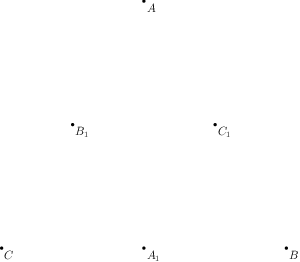

In [14]:
F.asy_write(300,-1,1,-1,1,"midpoint","png",with_realline=False)
Image("midpoint.png")

As we can see all intermediate cycles in the midpoints constructions are hidden and only the resulting midpoints are shown.

There is no  reasons to stop here, we can repeat the process to create a Serpinsky-like pattern:

In [8]:
V=[A1,B1,C1]
L=["A", "B", "C"]
for i in range(5):
    V1=[]
    for j in range(3):
        V1 = [F.add_subfigure(SF, [V[j % 3], V[(j+1) % 3], N], "%s%s" % (L[(j+2) % 3], i+2))] + V1
        F.set_asy_style(V1[0], "rgb(%s,%s,0)" % (i*.2, (4-i)*.2))
    V = V1

To see the image we may want labels to be omitted:

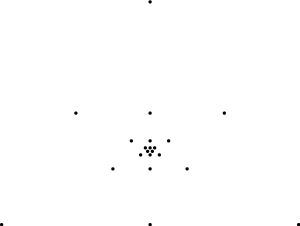

In [9]:
F.asy_write(300,-1,1,-1,1,"midpoint2","png",with_realline=False, with_labels=False)
Image("midpoint2.png")

To bring a flavour Lobachevsky geometry we replace the cycle `N` from the infinity to the horizontal line. Then the straight lines in the construction will be replaced by "lines" in the [Lobachevsky geometry](http://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Introduction/Euclidean_and_Lobachevsky_lines.html) of the upper half-plane: arcs of circles perpendicular to the boundary.

In [ ]:
F.move_cycle(N,cycle_data(0, [0,1], -1.5))
F.asy_write(300,-1,1,-1,1,"midpoint3","png", with_realline=False, with_labels=False)
Image("midpoint3.png")

[Back to ToC](#ToC)

<a id="furtherReading"></a>
## Further reading

Subfigures are also very useful in [moebinv-GUI](http://moebinv.sourceforge.net/moebinv-gui-manual-whole004.html)—an interactive geometry package. A user can create/store extensive libraries of subfigures to be ready for instant usage during various geometric constructions. Subfigures and their libraries can be [easily interchanged](http://moebinv.sourceforge.net/moebinv-gui-manual-whole005.html) between `Python` script and interactive `moebinv-GUI`.

We have considered the main features of the MoebInv package. A reader can now start his/her pwn exploration of the Lie spheres geometry. Our [*MoebInv notebooks*](https://github.com/vvkisil/MoebInv-notebooks) and [Ref.2](#refKisil12), [Ref.5](#refKisil19) can provide further inspiration.


[Back to ToC](#ToC)

<a id="references"></a>
### References

   <a id="refKisil07"></a>
1. V.V. Kisil. *Starting with the group SL2(R).* Notices Amer. Math. Soc., [**54**(11):1458–1465](http://www.ams.org/notices/200711/tx071101458p.pdf), 2007. [arXiv:math/0607387](https://arxiv.org/abs/math/0607387), Zbl # 1137.22006.

  <a id="refKisil12"></a>
2. V.V. Kisil. *Geometry of Möbius Transformations: Elliptic, Parabolic and Hyperbolic Actions of $SL_2(\mathbb{R})$*. [Imperial College Press](https://www.worldscientific.com/worldscibooks/10.1142/p835), London, 2012. Includes a live DVD.

  <a id="refKisilMN"></a>
3. V.V. Kisil, [*MoebInv notebooks*](https://github.com/vvkisil/MoebInv-notebooks), stated at 2019.

   <a id="refKisil18"></a>
4. V. V. Kisil. An extension of Mobius–Lie geometry with conformal ensembles of cycles and its implementation in a GiNaC library. Proc. Int. Geom. Cent., 11 (3):45–67, 2018. E-print: [arXiv:1512.02960](https://arxiv.org/abs/1512.02960). Project page: http://moebinv.sourceforge.net/.

   <a id="refKisil19"></a>
5. V. V. Kisil. Möbius–Lie geometry and its extension. In I. M. Mladenov, G. Meng, and A. Yoshioka (eds.) Geometry, integrability and quantization XX, pages 13–61, Bulgar. Acad. Sci., Sofia, 2019. E-print: [arXiv:1811.10499](https://arxiv.org/abs/1811.10499).

  <a id="refKisil20"></a>
6.  V. V. Kisil. *MoebInv: C++ libraries for manipulations in non-Euclidean geometry*. SoftwareX, **11**:100385, 2020. doi: [10.1016/j.softx.2019.100385](http://dx.doi.org/10.1016/j.softx.2019.100385).

[Back to ToC](#ToC)

Back to the [top-level Table of Contents](https://github.com/vvkisil/MoebInv-notebooks/blob/master/Table_of_contents.md).